<a href="https://colab.research.google.com/github/oksuzian/Mu2eANL/blob/master/CosmicNeutrons/GeoComparing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import sys

# This allows you to run on Colaboratory and load files from your Google Drive
try:
    from google.colab import drive
    drive.mount("/content/drive")
    main_path = '/content/drive/My Drive/'
except:
    main_path = ''
sys.path.append(main_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
!pip install mplhep
import mplhep as hep
hep.style.use('ATLAS')  # or ATLAS/LHCb2

In [81]:
!pip install uproot3
!pip install hist

import uproot3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hist

In [82]:
def default_flatname(branchname, fieldname, index):
    """This replaces the dot in the column names with underscores"""
    out = branchname.replace(".", "_")
    if not isinstance(branchname, str):
        out = branchname.decode("utf-8")
    if fieldname is not None:
        fieldname.replace(".", "_")
        out += "_" + fieldname
    if index != ():
        out += "[" + "][".join(str(x) for x in index) + "]"
    return out

In [83]:
f3feet = uproot3.open("drive/MyDrive/root_files_dzhadan/ord_geom_more_stat.root")
f6feet = uproot3.open("drive/MyDrive/root_files_dzhadan/double_s_geom_more_stat3.root")
f5pctLess = uproot3.open("drive/MyDrive/root_files_dzhadan/ord_geom_less.root")

In [84]:
df3feet = f3feet["HitDumper/nt"].pandas.df(['hits'], flatname=default_flatname, flatten=True)
df6feet = f6feet["HitDumper/nt"].pandas.df(['hits'], flatname=default_flatname, flatten=True)
df5pctLess = f5pctLess["HitDumper/nt"].pandas.df(['hits'], flatname=default_flatname, flatten=True)

In [85]:
h = hist.Hist(
    hist.axis.StrCategory(["3f", "6f", "5pctLess"], name="cat"),
    hist.axis.Regular(30, 0, 3000, name="x"),
    hist.storage.Weight(),
)

In [86]:
h.fill(cat="3f", x=df3feet.query("hits_ek > 250 & hits_pdgId == 2112")["hits_ek"].to_numpy())
h.fill(cat="6f", x=df6feet.query("hits_ek > 250 & hits_pdgId == 2112")["hits_ek"].to_numpy());
h.fill(cat="5pctLess", x=df5pctLess.query("hits_ek > 250 & hits_pdgId == 2112")["hits_ek"].to_numpy());

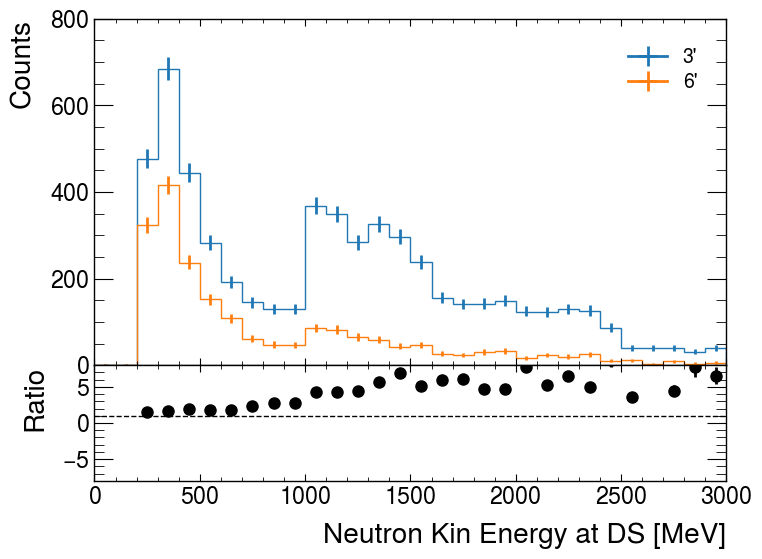

In [87]:
fig = plt.figure()
h["3f", :].plot_ratio(h["6f", :], rp_num_label="3'", rp_denom_label="6'", rp_ratio_ylim=[0,1], rp_uncert_draw_type='line');
fig.get_axes()[1].set_ylim(-8,8) #ratio
fig.get_axes()[1].set_xlabel('Neutron Kin Energy at DS [MeV]');

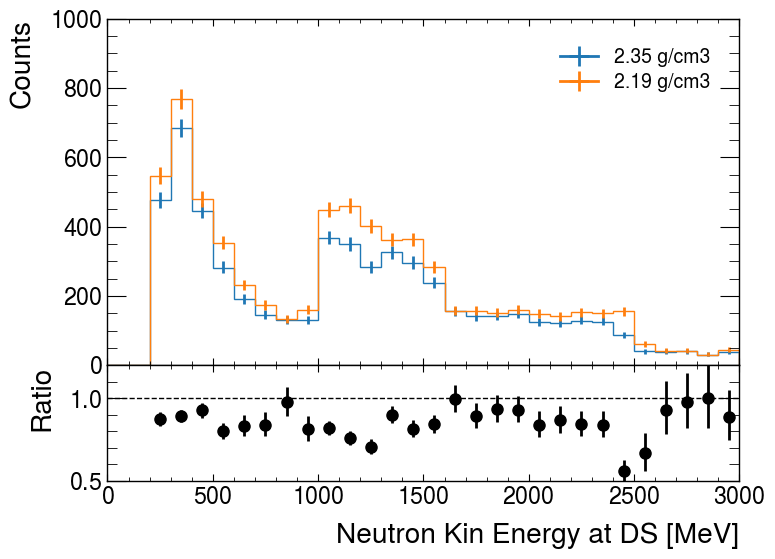

In [88]:
fig = plt.figure()
h["3f", :].plot_ratio(h["5pctLess", :], rp_num_label="2.35 g/cm3", rp_denom_label="2.19 g/cm3", rp_ratio_ylim=[0,1], rp_uncert_draw_type='line');
#h["3f", :].plot_ratio(h["6f", :], rp_num_label="2.35 g/cm3", rp_denom_label="6f", rp_ratio_ylim=[0,1], rp_uncert_draw_type='line');
fig.get_axes()[1].set_ylim(0.5,1.2) #ratio
fig.get_axes()[1].set_xlabel('Neutron Kin Energy at DS [MeV]');